<a href="https://colab.research.google.com/github/kkkonts/coursera-matstat-AB/blob/main/hw04_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [1]:
!pip install plotly_express

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
%matplotlib inline

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице.

In [62]:
df = pd.read_csv('walmart.csv')
df['Date'] =  pd.to_datetime(df.Date)
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [7]:
# Формат ответа: целое число, пример: 510782
ans1 = df.shape[0]
ans1

418239

In [8]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас

__в)__ Разберитесь с пропущенными переменными:

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их.
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [45]:
# Формат ответа: целое число, пример: 6

nulls_prc = df.isnull().sum() / df.shape[0] * 100
colms = nulls_prc[nulls_prc > 60].index
ans2 = len(colms)


<Axes: >

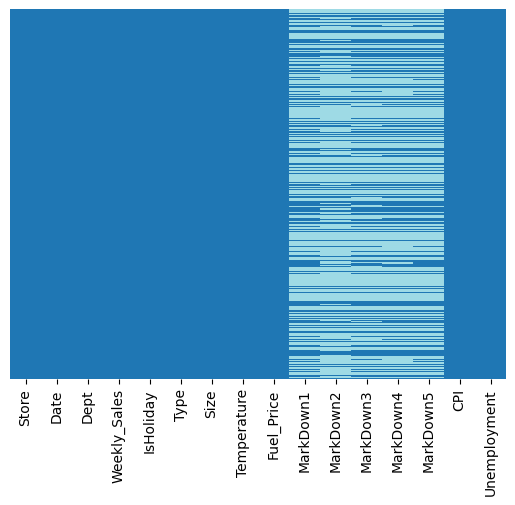

In [34]:
sns.heatmap(df.sample(frac=0.1).isnull(), yticklabels=False,
                          cbar=False,
                          cmap='tab20')

In [63]:
df = df.drop(columns=colms)
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [42]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`.

In [69]:
# Формат ответа: целое число, пример: 555
ans3 = df.Store.unique().shape[0]
ans4 = df.Dept.unique().shape[0]
ans5 = (df.Date.max() - df.Date.min()).days
ans4

81

In [70]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны?

<ipython-input-87-173e17f9f996>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df.groupby('Date').sum()['Weekly_Sales']


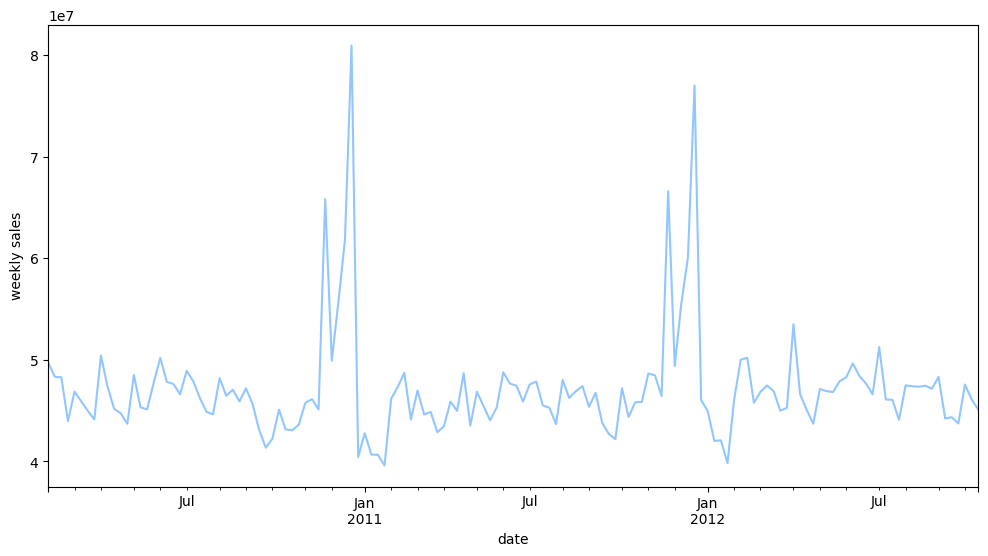

In [87]:
# Формат ответа: строка, пример: '2010-12-04'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве

df_day = df.groupby('Date').sum()['Weekly_Sales']
df_day.plot(figsize=(12,6))
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.show();

In [106]:
ans6 = df_day[df_day == df_day.max()].index[0].strftime("%Y-%m-%d")
ans6

'2010-12-24'

In [107]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной).

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

<ipython-input-112-e7ba7312c7b5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(), square=True,
<ipython-input-112-e7ba7312c7b5>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ans7 = df_corr.corr().max()


Weekly_Sales    1.0
IsHoliday       1.0
Temperature     1.0
Fuel_Price      1.0
CPI             1.0
Unemployment    1.0
dtype: float64

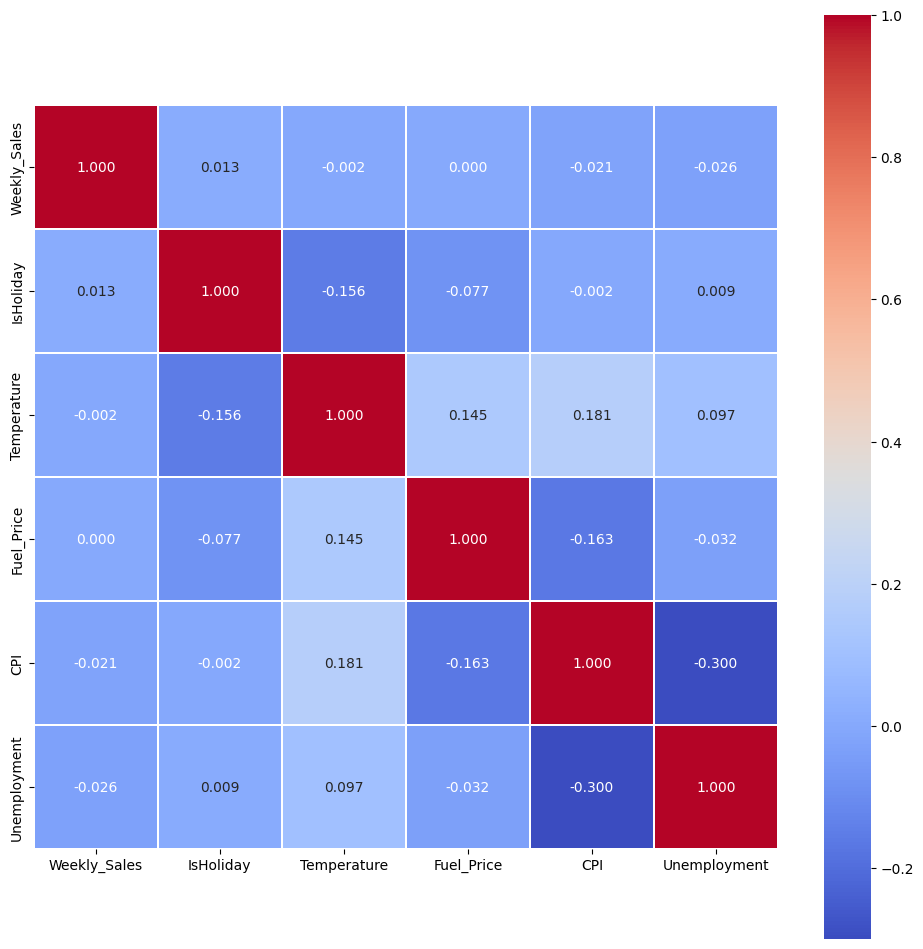

In [112]:
# Формат ответа действительное число, пример: 0.22222
# Не забудьте взять модуль от матрицы корреляций!
df_corr = df.drop(columns=['Dept', 'Store', 'Size'])
plt.subplots(figsize=(12, 12))
sns.heatmap(df_corr.corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap='coolwarm')

In [125]:
ans7 = (df_corr.corr().abs()
        .where(np.triu(np.ones(df_corr.corr().shape), k=1)
        .astype(bool))
        .stack()
        .sort_values(ascending=False)
        [0])
ans7

<ipython-input-125-65b964def5b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ans7 = (df_corr.corr().abs()
<ipython-input-125-65b964def5b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .where(np.triu(np.ones(df_corr.corr().shape), k=1)


0.2997230218739881

Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь?
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось?

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


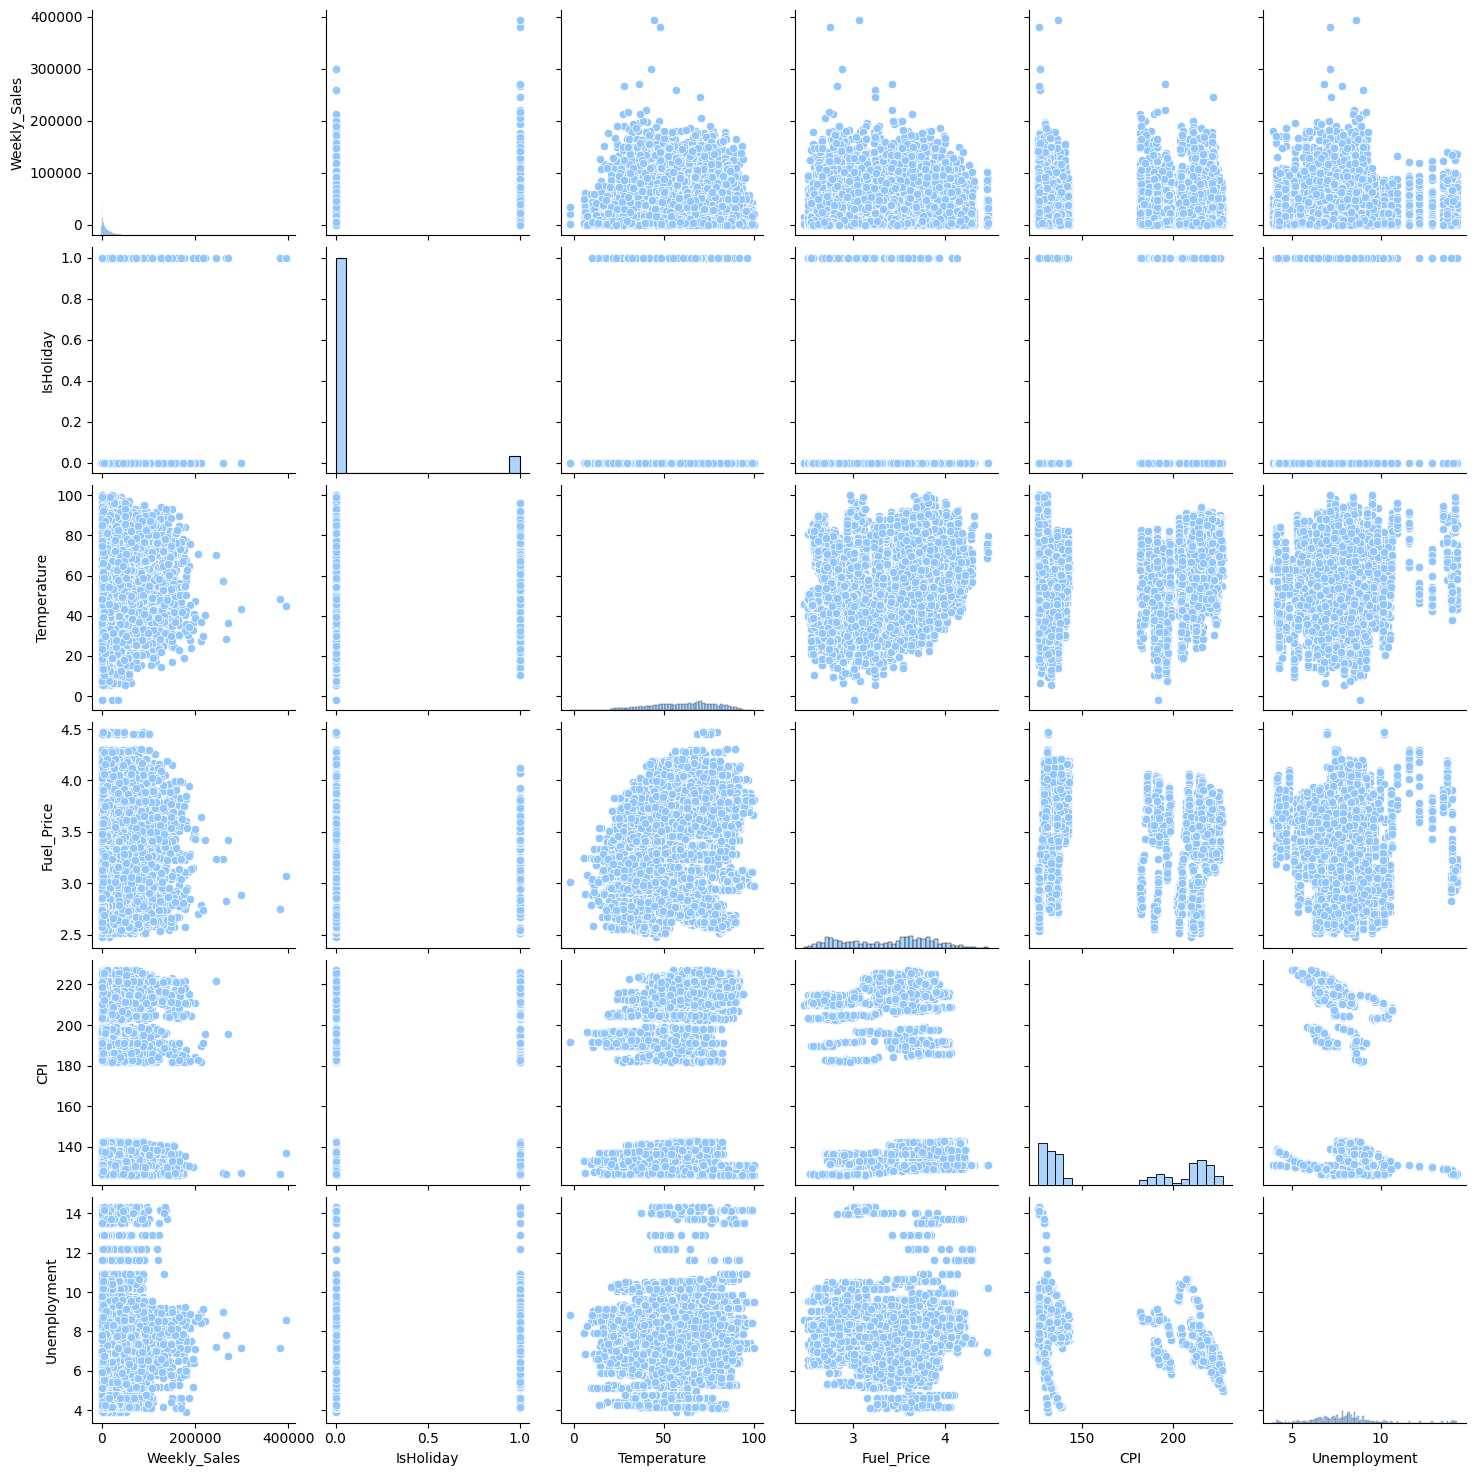

In [126]:
sns.pairplot(df_corr.sample(frac=0.1))

In [127]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик?

In [176]:
top5 = (df.groupby('Store')['Weekly_Sales']
        .sum()
        .sort_values(axis=0, ascending=False)[:5]
        .index)

list_of_stores = []

for store in top5:
    list_of_stores.append(df[df['Store']==store])
list_of_stores[:2]

[       Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  \
 10167      2 2010-02-05     1      35034.06      False    A  202307   
 10168      2 2010-02-12     1      60483.70       True    A  202307   
 10169      2 2010-02-19     1      58221.52      False    A  202307   
 10170      2 2010-02-26     1      25962.32      False    A  202307   
 10171      2 2010-03-05     1      27372.05      False    A  202307   
 ...      ...        ...   ...           ...        ...  ...     ...   
 20322      2 2012-08-24    99         60.10      False    A  202307   
 20323      2 2012-08-31    99         20.07      False    A  202307   
 20324      2 2012-09-07    99          0.12       True    A  202307   
 20325      2 2012-09-14    99          0.06      False    A  202307   
 20326      2 2012-10-05    99        595.00      False    A  202307   
 
        Temperature  Fuel_Price         CPI  Unemployment  
 10167        40.19       2.572  210.752605         8.324  
 10168        

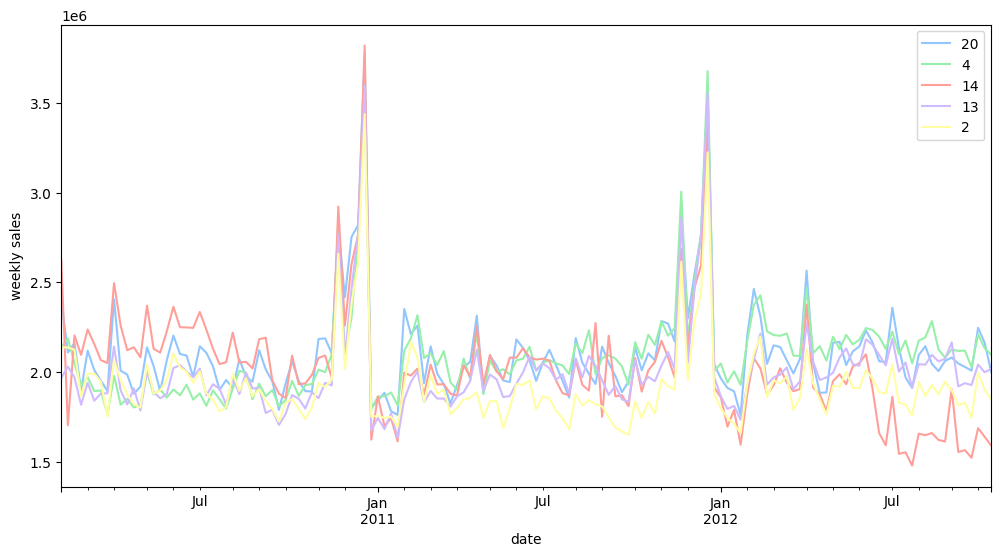

In [175]:
for df in list_of_stores:
    lbl = df.iloc[1,0]
    df_day = df.groupby('Date')['Weekly_Sales'].sum()
    df_day.plot(figsize=(12,6), label=lbl)
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.legend()
plt.show();

__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [220]:
from datetime import date

top10 = (df[(df['Type'] == 'A') &
            (df['Date'].dt.year == 2011)]
         .groupby('Dept')['Weekly_Sales']
         .sum()
         .sort_values(axis=0, ascending=False)[:10]
         .index)

list_of_depts = []

for dept in top10:
    list_of_depts.append(df[(df['Dept'] == dept)
                        & (df['Type'] == 'A')
                        & (df['Date'].dt.year == 2011)])
list_of_depts[:1]

[       Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  \
 10357      2 2011-01-07     2      62974.44      False    A  202307   
 10358      2 2011-01-14     2      56606.30      False    A  202307   
 10359      2 2011-01-21     2      62126.32      False    A  202307   
 10360      2 2011-01-28     2      59940.76      False    A  202307   
 10361      2 2011-02-04     2      60069.23      False    A  202307   
 10362      2 2011-02-11     2      70619.64       True    A  202307   
 10363      2 2011-02-18     2      69487.17      False    A  202307   
 10364      2 2011-02-25     2      65829.84      False    A  202307   
 10365      2 2011-03-04     2      70042.14      False    A  202307   
 10366      2 2011-03-11     2      67898.82      False    A  202307   
 10367      2 2011-03-18     2      64567.40      False    A  202307   
 10368      2 2011-03-25     2      60715.50      False    A  202307   
 10369      2 2011-04-01     2      65018.79      False    A  20

<Axes: xlabel='x'>

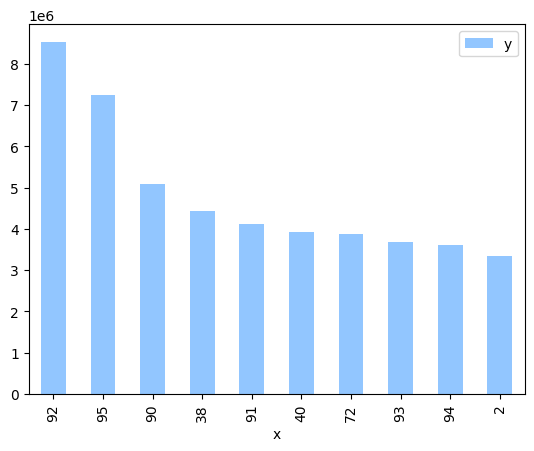

In [219]:
x = []
y = []
for df in list_of_depts:
    x.append(str(df.iloc[1,2]))
    y.append(df['Weekly_Sales'].sum())

tmp_df = pd.DataFrame({'x': x, 'y': y}).set_index('x')
tmp_df.plot(kind='bar')

# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому.

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд. __Корреляция не обозначает причинности.__